In [ ]:
# Importing the necessary libraries
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
!pip install sqlalchemy
!pip install pymysql

     |████████████████████████████████| 51kB 3.7MB/s 


In [ ]:
db_host = '54.255.64.49'
username = 'dm_team1'
user_pass = 'DM!$Team&279@20!'
db_name = 'project_banking'

conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)
conn.table_names()

['Cust_Account', 'Cust_Demographics', 'Cust_Enquiry']

In [ ]:
query = "select * from Cust_Account"
data_acnt= pd.read_sql(query,conn)
print(data_acnt.shape)
data_acnt

(186329, 21)


,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,24228,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,0,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,0,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,0,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,


In [ ]:

ColList = ['customer_no','high_credit_amt', 'cur_balance_amt', 'amt_past_due', 'creditlimit','cashlimit']
data_acnt=data_acnt.loc[:,ColList]
data_acnt.head()

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,12265,20900,0,,,
1,12265,16201,10390,,14000,1400
2,12265,41028,34420,,,
3,15606,93473,0,,,
4,15606,20250,13500,,,


In [ ]:
data_acnt.replace('',np.nan,inplace=True)

In [ ]:
data_acnt.head()

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,12265,20900,0,NaN,NaN,NaN
1,12265,16201,10390,NaN,14000,1400
2,12265,41028,34420,NaN,NaN,NaN
3,15606,93473,0,NaN,NaN,NaN
4,15606,20250,13500,NaN,NaN,NaN


In [ ]:
data_acnt.fillna(0,inplace=True)
data_acnt.head()

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,12265,20900,0,0,0,0
1,12265,16201,10390,0,14000,1400
2,12265,41028,34420,0,0,0
3,15606,93473,0,0,0,0
4,15606,20250,13500,0,0,0


In [ ]:
data_acnt.to_csv('data_acnt.csv',index=False)

In [ ]:

print(data_acnt.shape)

(186329, 6)


In [ ]:
pd.read_csv('data_acnt.csv')

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,12265,20900,0,0,0,0
1,12265,16201,10390,0,14000,1400
2,12265,41028,34420,0,0,0
3,15606,93473,0,0,0,0
4,15606,20250,13500,0,0,0
...,...,...,...,...,...,...
186324,1611,24228,24228,0,0,0
186325,1611,19584,0,0,0,0
186326,1611,50844,0,0,0,0
186327,1611,35587,0,0,15000,6000


# **Cust_Enquiry**

In [ ]:
query = "select * from Cust_Enquiry"
Cust_Enquiry= pd.read_sql(query,conn)
print(Cust_Enquiry.shape)
Cust_Enquiry

(413188, 6)


,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000
...,...,...,...,...,...,...
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5,200000
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10,50000
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10,50000
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1,330000


In [ ]:
Cust_Enquiry.columns

Index(['dt_opened', 'customer_no', 'upload_dt', 'enquiry_dt', 'enq_purpose',
       'enq_amt'],
      dtype='object')

In [ ]:
data1=Cust_Enquiry.loc[:,['customer_no','enq_amt']]
data1.head(10)

,customer_no,enq_amt
0,1,3500000
1,1,500000
2,1,50000
3,1,50000
4,1,1000
5,1,1000
6,1,1000
7,1,1000
8,1,1000
9,1,150


In [ ]:
Cust_group=data1.groupby(['customer_no'])
Cust_group.head()

,customer_no,enq_amt
0,1,3500000
1,1,500000
2,1,50000
3,1,50000
4,1,1000
...,...,...
413172,23896,10000
413173,23896,1000
413174,23896,15000
413175,23896,1000


In [ ]:
df_amt=pd.DataFrame(Cust_group.sum()).reset_index()
df_amt.columns = ['customer_no','total_enq_amt']
df_amt.head()

,customer_no,total_enq_amt
0,1,3500000500000500005000010001000100010001000150...
1,10,2000000200000002000000055000005500000100050000...
2,100,5000010000110000130000030000040000010000100001...
3,1000,10000100010000100001000050000500005000010001000
4,10000,9000200002220005000010000050000500005000056250...


In [ ]:

data1_count=pd.DataFrame(Cust_group.count()).reset_index()
data1_count.columns = ['customer_no','total_enq_count']
data1_count.head()

,customer_no,total_enq_count
0,1,18
1,10,21
2,100,19
3,1000,10
4,10000,14


In [ ]:

data_final=pd.merge(data1_count,df_amt,on='customer_no',how='inner')
data_final.head()

,customer_no,total_enq_count,total_enq_amt
0,1,18,3500000500000500005000010001000100010001000150...
1,10,21,2000000200000002000000055000005500000100050000...
2,100,19,5000010000110000130000030000040000010000100001...
3,1000,10,10000100010000100001000050000500005000010001000
4,10000,14,9000200002220005000010000050000500005000056250...


In [ ]:
data_final.to_csv('Cust_enq_final.csv',index=False)

In [ ]:
pd.read_csv('Cust_enq_final.csv')

,customer_no,total_enq_count,total_enq_amt
0,1,18,3500000500000500005000010001000100010001000150...
1,10,21,2000000200000002000000055000005500000100050000...
2,100,19,5000010000110000130000030000040000010000100001...
3,1000,10,10000100010000100001000050000500005000010001000
4,10000,14,9000200002220005000010000050000500005000056250...
...,...,...,...
23891,9995,17,1000050000150000500001500001000010000100005000...
23892,9996,8,1000004400044000500001500005000010001000
23893,9997,17,1000050000150005000015000970005000010001500001...
23894,9998,6,50000500005000050000500001000


# **Cust_Demographics**

In [ ]:
query = "select * from Cust_Demographics"
data_demo= pd.read_sql(query,conn)
print(data_demo.shape)
data_demo

(23896, 83)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,...,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,...,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,...,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,...,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,...,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704,1,Card Setup,14,119000,,,,Y,PD1,PD3,12,SA05,MA01,,,1,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,...,0,6,Gurgaon,122001,,PAN Card,CUQPSXXXXX,,,Y,State Bank of India,99000,01-Jan-15,17-Jun-16,1,10,Y,N,Y,N,,Y,1988-10,10,157,110045,0,1,33000,0-0,13,R,Y,,0000-00-00,0,XXXXX,1,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,,,2,Card Setup,14,35000,,,,Y,PD1,PD3,12,SA03,AS33,,,1,DTPPSXXXXX,01-Feb-87,99101XXXXX,N,@GMAIL.COM,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,...,3,0,New Delhi,110037,@GMAIL.COM,PAN Card,DTPPSXXXXX,,,N,,0,,17-Jun-16,1,10,N,N,Y,N,,Y,2014-12,33,102,282001,1,1,1,0-0,10,O,Y,,0000-00-00,0,99101XXXXX,1,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748,3,Card Setup,14,68000,,,,Y,PM1,,,CD01,D066,,,1,CPOPSXXXXX,08-Nov-86,99111XXXXX,Y,@G

In [ ]:
data_demo.describe()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
count,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,...,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896
unique,197,23896,297,8,282,263,4,2,2,485,20,20,8,3,17,15,3,365,523,303,13,3,10610,8463,3251,3,722,3,12,11,63,965,53,14,6,3,4,4334,10,12,...,13,13,71,937,4473,6,11250,57,19,3,11,660,181,2,5,13,3,3,3,3,9,3,492,28,425,3013,3,4,4334,134,14,3,3,4,63,6,3124,4,3,2
top,16-Nov-15,19856,19-Oct-15,Platinum Maxima,,,3,Card Setup,14,35000,,,,Y,PM1,,12,SA03,AS19,,,1,AXMPKXXXXX,01-Jan-85,99999XXXXX,N,@GMAIL.COM,1,0,Graduate,New Delhi,110059,2010,0,Self,Y,1,1,Private Ltd. Co.,Banking/Financial Services,...,0,0,New Delhi,201301,,PAN Card,XXXXX,,,Y,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2010-0,10,157,110059,0,1,1,0-0,10,R,,,0000-00-00,0,XXXXX,1,N,0
freq,699,1,180,9056,2836,2836,14593,23881,23881,797,22635,22635,23845,22611,8853,13004,10892,9331,1374,22869,23878,22701,16,33,194,21528,15595,18295,15503,14610,12539,1097,1839,21315,10833,19478,18214,8392,8677,13187,...,5944,23181,9760,2320,13713,22796,94,18399,23792,12565,11422,11807,11610,23881,22693,12539,21503,23425,22611,23563,23887,23876,1670,10257,10257,944,19478,18214,8392,18235,9760,15617,20951,23879,23820,23817,2149,22958,23876,22892


In [ ]:
data_demo.replace('',np.nan,inplace=True)
data_demo.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,NaN,NaN,NaN,Y,IS1,NaN,0,159,4284,4284,NaN,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,NaN,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,NaN,NaN,...,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,NaN,Y,Y,N,NaN,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,NaN,NaN,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,NaN,NaN,NaN,Y,IS1,NaN,0,91,B001,4077,NaN,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,NaN,Bengaluru,560042,1969,0,Self,Y,2,1,NaN,NaN,...,0,0,Bangalore,560042,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0,NaN,17-Jun-16,1,17,NaN,Y,Y,N,NaN,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,NaN,NaN,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,NaN,NaN,NaN,Y,IS1,NaN,0,91,B001,4077,NaN,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,NaN,Bengaluru,560042,1966,0,Self,Y,2,1,NaN,NaN,...,0,0,Bangalore,560042,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0,NaN,17-Jun-16,3,17,NaN,N,Y,N,NaN,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,NaN,NaN,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,NaN,NaN,NaN,Y,IS1,NaN,0,157,5107,5107,NaN,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,NaN,Pune,411001,1988,0,Self,Y,2,100000,NaN,NaN,...,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0,NaN,17-Jun-16,1,21,NaN,Y,Y,N,NaN,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,NaN,NaN,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3,Card Setup,14,500000,NaN,NaN,NaN,Y,IS1,NaN,0,100,D016,4564,NaN,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,NaN,Gurgaon,122009,1995,0,Self,Y,2,300000,NaN,NaN,...,0,0,Gurgaon,122009,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0,NaN,17-Jun-16,1,13,NaN,Y,Y,N,NaN,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,NaN,NaN,0000-00-00,0,98111XXXXX,1,N,0


In [ ]:
DemColList=['dt_opened', 'customer_no', 'entry_time', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22',
       'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37',
       'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42',
       'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47',
       'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52',
       'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57',
       'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62',
       'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67',
       'feature_68', 'feature_69', 'feature_70', 'feature_71', 'feature_72',
       'feature_73', 'feature_74', 'feature_75', 'feature_76', 'feature_77',
       'feature_78', 'feature_79', 'Bad_label']

In [ ]:
print(data_acnt.shape)
print(data_demo.shape)
print(data_final.shape)


(186329, 6)
(23896, 83)
(23896, 3)


In [ ]:

data1_final=pd.merge(data_demo,data_acnt,on='customer_no', how='left')
data1_final.shape

(186329, 88)

In [ ]:
data1_final.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,...,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,NaN,NaN,NaN,Y,IS1,NaN,0,159,4284,4284,NaN,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,NaN,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,NaN,NaN,...,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,NaN,Y,Y,N,NaN,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,NaN,NaN,0000-00-00,0,98332XXXXX,1,N,0,2528846,2528846,2528846,0,0
1,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,NaN,NaN,NaN,Y,IS1,NaN,0,159,4284,4284,NaN,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,NaN,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,NaN,NaN,...,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,NaN,Y,Y,N,NaN,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,NaN,NaN,0000-00-00,0,98332XXXXX,1,N,0,125459,58882,0,250000,0
2,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,NaN,NaN,NaN,Y,IS1,NaN,0,159,4284,4284,NaN,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,NaN,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,NaN,NaN,...,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,NaN,Y,Y,N,NaN,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,NaN,NaN,0000-00-00,0,98332XXXXX,1,N,0,139765,0,0,0,0
3,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,NaN,NaN,NaN,Y,IS1,NaN,0,159,4284,4284,NaN,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,NaN,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,NaN,NaN,...,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,NaN,Y,Y,N,NaN,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,NaN,NaN,0000-00-00,0,98332XXXXX,1,N,0,0,0,0,0,0
4,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,NaN,NaN,NaN,Y,IS1,NaN,0,159,4284,4284,NaN,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,NaN,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,NaN,NaN,...,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,NaN,Y,Y,N,NaN,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,NaN,NaN,0000-00-00,0,98332XXXXX,1,N,0,171256,0,0,0,0


In [ ]:
data1_final=pd.merge(data1_final,data_final,on='customer_no', how='left')
data1_final.shape

(186329, 90)

In [ ]:
data1_final.to_csv('final_data.csv',index=False)

In [ ]:
data_final1 = pd.read_csv('final_data.csv')
data_final1.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,15,19,20,59,63,75) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,...,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,total_enq_count,total_enq_amt
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,...,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,2528846,2528846,2528846,0,0,18,3500000500000500005000010001000100010001000150...
1,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,...,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,125459,58882,0,250000,0,18,3500000500000500005000010001000100010001000150...
2,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,...,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,139765,0,0,0,0,18,3500000500000500005000010001000100010001000150...
3,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,...,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,0,0,0,0,0,18,3500000500000500005000010001000100010001000150...
4,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,...,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,171256,0,0,0,0,18,3500000500000500005000010001000100010001000150...


In [ ]:
#data_final1.fillna(0,inplace=True)
#data_final1.head()

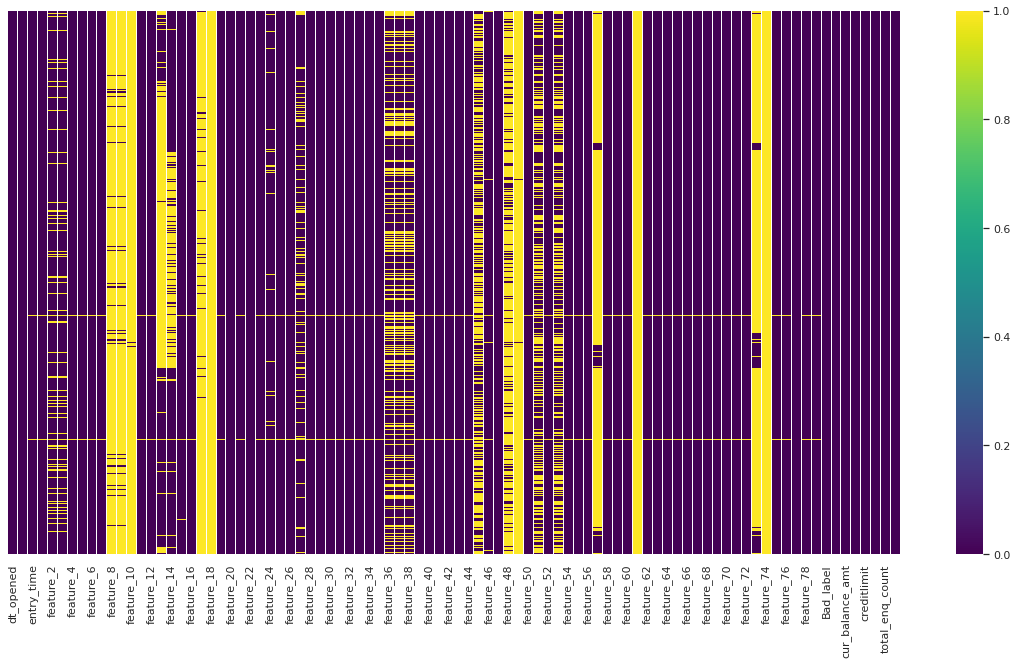

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.heatmap(data_final1.isnull(),yticklabels=False,cbar=True,cmap='viridis')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


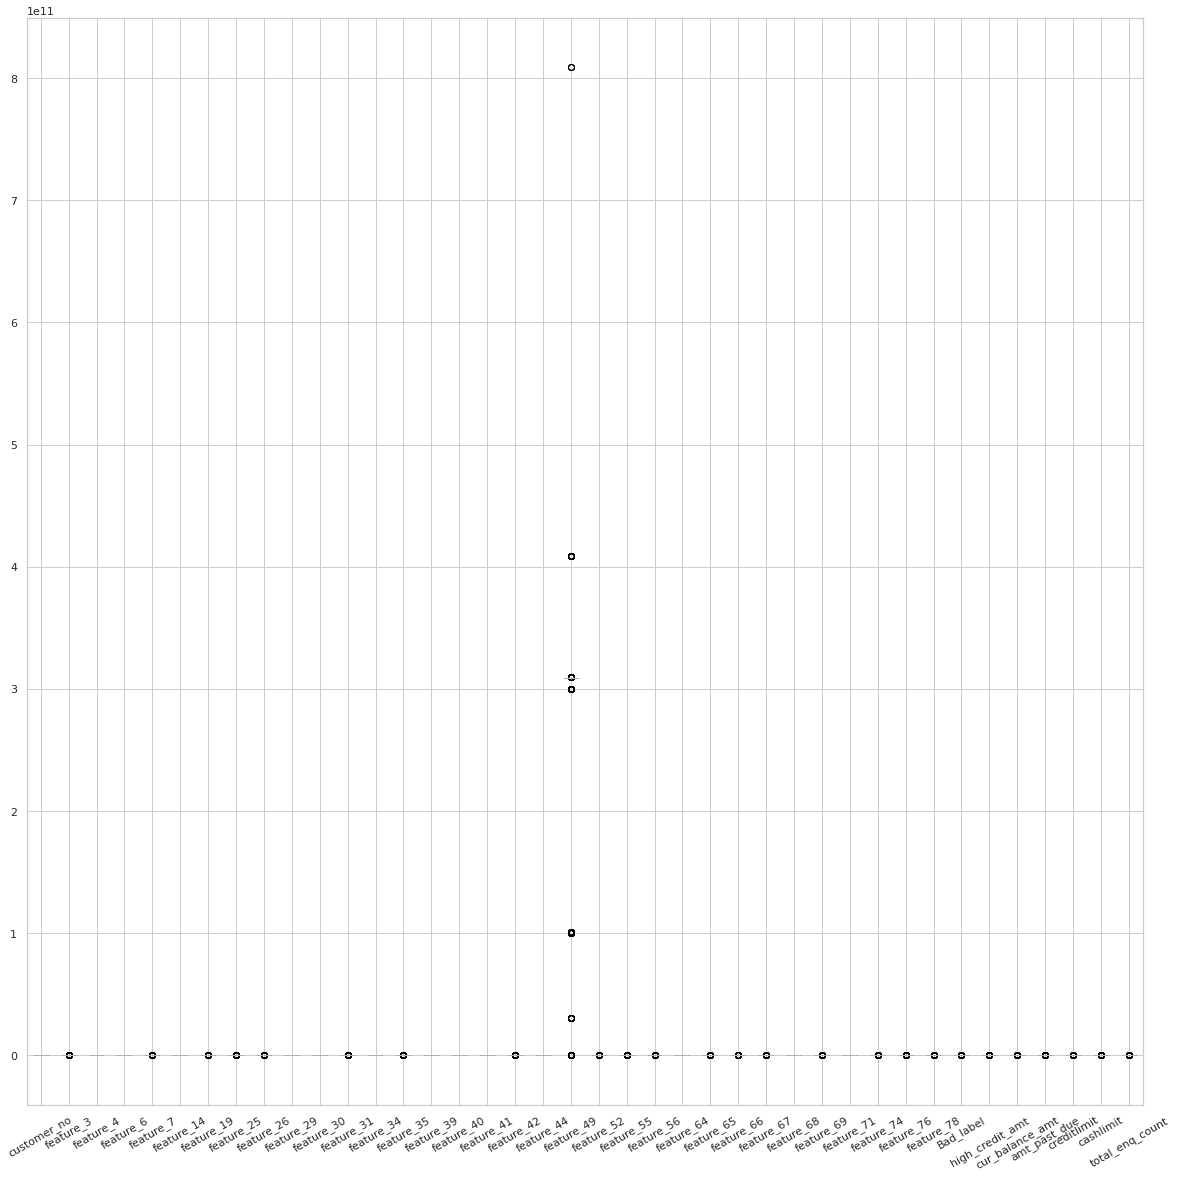

In [ ]:
data_final1.boxplot(figsize=(20,20),rot=30);

In [ ]:
from scipy import stats

In [ ]:
dt_open=data_final1.groupby(by=['Bad_label'])['customer_no'].mean()
dt_open

Bad_label
0    11441.765597
1    11161.549372
Name: customer_no, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


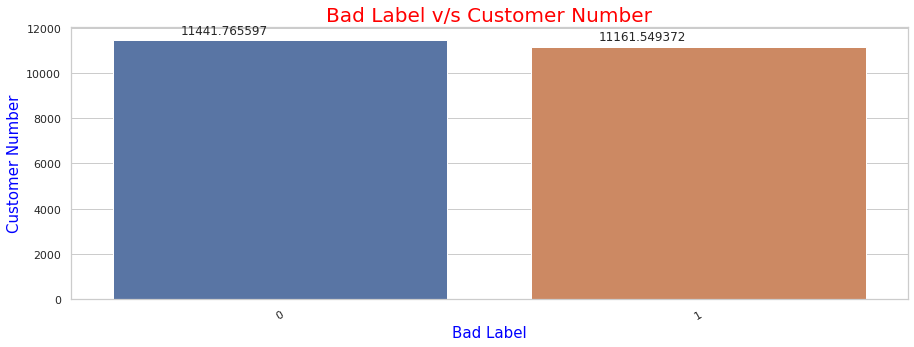

In [ ]:

plt.figure(figsize=(15,5))
splot=sns.barplot(data_final1['Bad_label'],data_final1['customer_no'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Bad Label",fontsize=15,color='blue')
plt.ylabel("Customer Number",fontsize=15,color='blue')
plt.title("Bad Label v/s Customer Number",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Text(0.5, 1.0, 'Count of Opened Date')

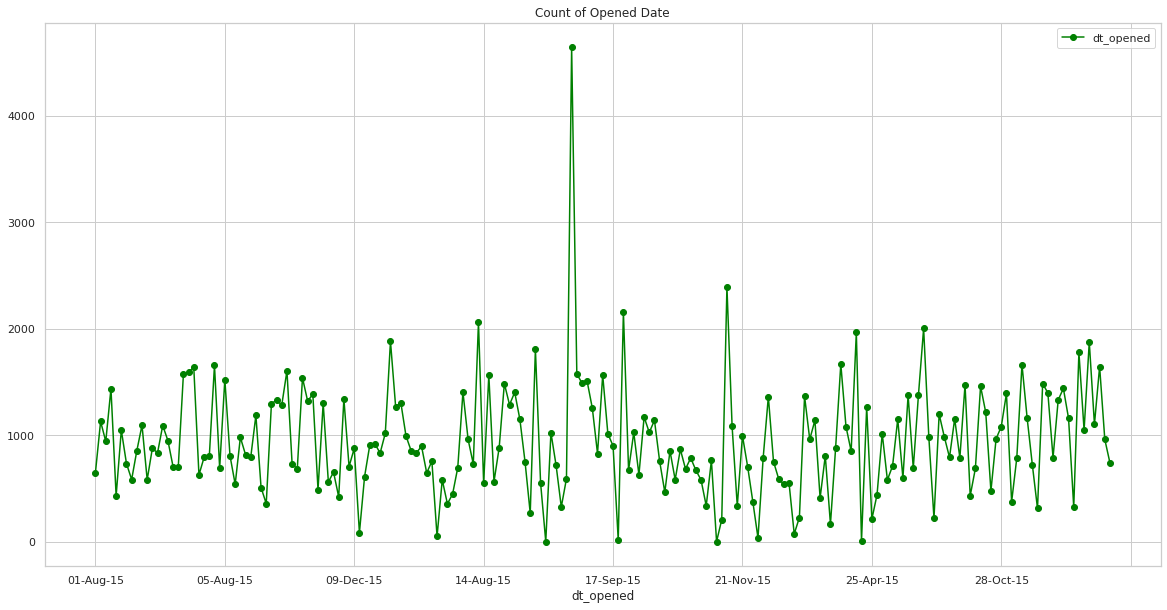

In [ ]:
Cust_demo=data_final1.groupby(['dt_opened'])['dt_opened'].count().to_frame()
Cust_demo.plot(kind='line',figsize=[20,10],color='green',marker='o')
plt.title("Count of Opened Date")

Text(0.5, 1.0, 'Count of Entry Time')

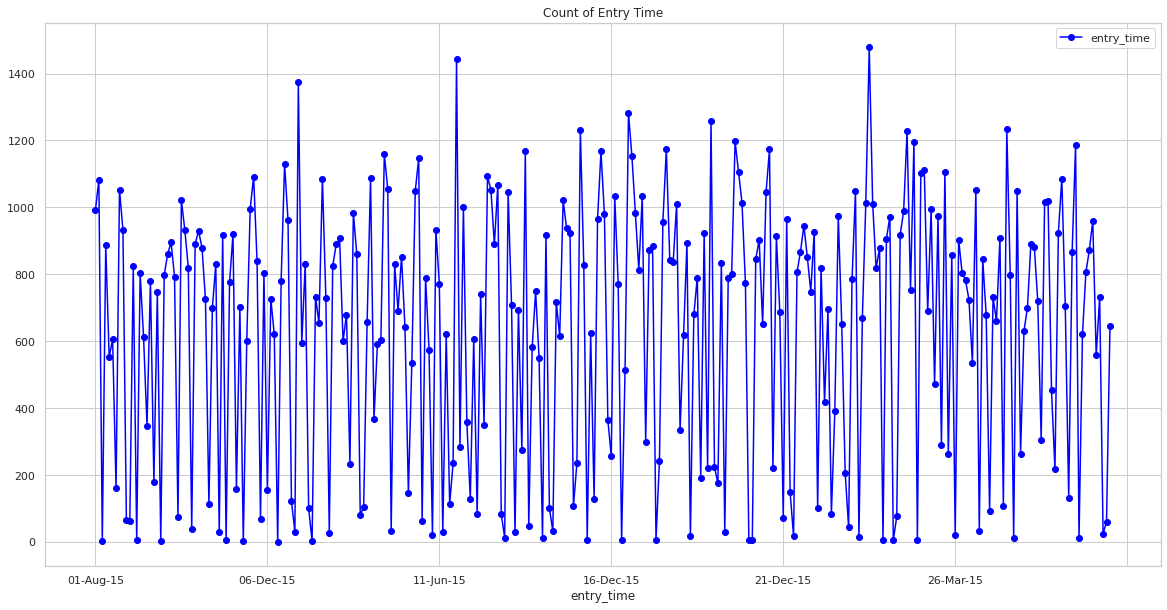

In [ ]:
Cust_demo=data_final1.groupby(['entry_time'])['entry_time'].count().to_frame()
Cust_demo.plot(kind='line',figsize=[20,10],color='blue',marker='o')
plt.title("Count of Entry Time")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


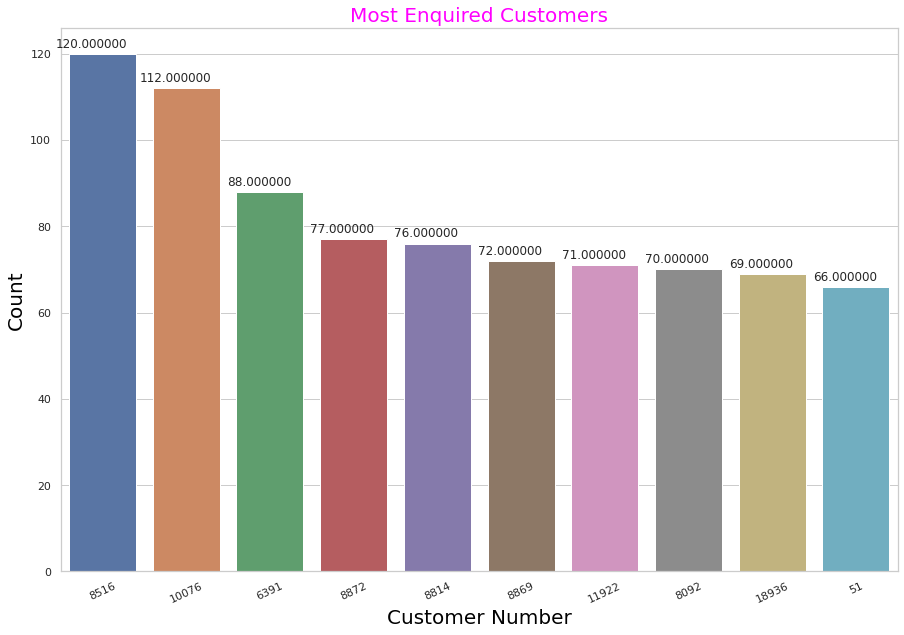

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
splot=sns.countplot(data_final1['customer_no'],order=data_final1['customer_no'].value_counts().index[:10])
plt.xticks(rotation=25)
plt.xlabel('Customer Number',fontsize=20,color='black')
plt.ylabel('Count',fontsize=20,color='black')
plt.title("Most Enquired Customers",fontdict={'fontsize':20,'color':'magenta'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [ ]:
data_final1.corr()

,customer_no,feature_3,feature_4,feature_6,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_49,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_74,feature_76,feature_78,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,total_enq_count
customer_no,1.000000,0.049547,-0.217011,NaN,-0.019413,0.477515,-0.004363,0.023190,-0.305816,-0.226562,-0.033987,0.191891,0.003316,-0.063311,-0.003326,-0.011558,-0.027477,0.007439,-0.224743,0.208482,-0.057593,-0.006726,0.040656,0.055005,0.054233,-0.162389,0.039060,0.003316,-0.063311,0.059735,-0.431230,0.011471,-0.008320,-0.007703,-0.012404,-0.005074,-0.002925,-0.001993,0.000048,-0.073054
feature_3,0.049547,1.000000,-0.232432,NaN,0.311780,0.054048,0.023318,-0.125247,0.032454,-0.047702,-0.053612,0.001917,0.086885,0.055593,-0.085759,-0.077026,0.009524,-0.049054,-0.052208,0.134424,0.061366,0.022199,0.071658,0.047939,-0.035948,-0.082193,-0.066357,0.086885,0.055593,0.050372,-0.613564,0.026073,0.000214,-0.049379,0.049722,0.035317,-0.009508,0.009061,0.026136,-0.063511
feature_4,-0.217011,-0.232432,1.000000,NaN,-0.065904,0.134578,-0.013860,0.013389,0.217103,-0.152345,0.024666,-0.220912,-0.062440,0.016208,0.062926,-0.005921,0.033842,0.018555,-0.150885,0.135576,0.068735,-0.014732,0.020519,0.043590,0.084214,-0.096077,0.079540,-0.062440,0.016208,0.036339,-0.053305,-0.026895,0.019557,0.011921,-0.001226,-0.000303,0.000267,0.004722,0.002348,0.071090
feature_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature_7,-0.019413,0.311780,-0.065904,NaN,1.000000,-0.007064,-0.024325,-0.110560,0.080921,0.011905,-0.057909,-0.019533,0.088247,0.096194,-0.088311,-0.066974,0.007716,-0.038442,0.008429,-0.094106,0.520451,-0.016222,0.045029,0.028396,-0.055076,-0.018923,-0.045861,0.088247,0.096194,0.026421,-0.146743,0.074133,-0.012327,-0.060146,0.028874,0.005701,0.009408,0.131163,0.101962,0.028180
feature_14,0.477515,0.054048,0.134578,NaN,-0.007064,1.000000,-0.017605,0.007325,0.048318,-0.610773,-0.064125,-0.069803,-0.033012,-0.068120,0.032237,-0.091565,0.008126,0.000361,-0.604720,0.205293,0.007276,-0.023147,-0.000865,0.053295,0.105037,-0.419566,0.178938,-0.033012,-0.068120,0.060822,-0.084130,-0.035809,-0.005909,-0.008427,-0.030536,-0.019248,-0.005766,0.001018,0.006805,-0.130503
feature_19,-0.004363,0.023318,-0.013860,NaN,-0.024325,-0.017605,1.000000,0.020818,-0.041032,-0.021968,0.035191,0.004770,0.003833,-0.005694,-0.003420,-0.003160,-0.009416,-0.000840,-0.023333,0.045926,-0.037913,0.910054,-0.004086,-0.006687,-0.019195,-0.039786,-0.023984,0.003833,-0.005694,-0.008421,-0.215552,0.010997,0.004181,0.003159,0.009932,0.010055,-0.000950,-0.011081,-0.006957,-0.047638
feature_25,0.023190,-0.125247,0.013389,NaN,-0.110560,0.007325,0.020818,1.000000,-0.220109,-0.018840,0.042790,0.005171,-0.089153,-0.032054,0.090012,0.085169,-0.094005,0.092513,-0.009700,0.094391,-0.063174,-0.024805,-0.038871,-0.018095,0.021038,0.020973,0.059472,-0.089153,-0.032054,0.006218,-0.067260,-0.014703,0.004879,0.022073,-0.026202,-0.011802,-0.003013,0.019760,0.007176,-0.150677
feature_26,-0.305816,0.032454,0.217103,NaN,0.080921,0.048318,-0.041032,-0.220109,1.000000,0.067878,-0.019835,-0.180594,-0.002221,0.060940,0.003106,-0.024277,0.085758,-0.038855,0.066537,-0.077521,0.091597,-0.025472,0.065546,0.052349,-0.002576,0.036942,-0.018120,-0.002221,0.060940,0.051160,-0.126777,0.021968,0.012236,-0.024682,0.010216,0.003557,0.012713,0.004506,0.006936,0.072306
feature_29,-0.226562,-0.047702,-0.152345,NaN,0.011905,-0.610773,-0.021968,-0.018840,0.067878,1.000000,0.102335,-0.018134,-0.017585,0.097808,0.017273,0.103780,0.055527,0.003625,0.986284,-0.098381,0.027538,-0.019922,0.077711,-0.008376,-0.137370,0.757324,-0.195641,-0.017585,0.097808,-0.044027,-0.11

# **Feature engineering**

In [ ]:
data_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 90 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   dt_opened        186329 non-null  object 
 1   customer_no      186329 non-null  int64  
 2   entry_time       186196 non-null  object 
 3   feature_1        186196 non-null  object 
 4   feature_2        165928 non-null  object 
 5   feature_3        165928 non-null  float64
 6   feature_4        186196 non-null  float64
 7   feature_5        186196 non-null  object 
 8   feature_6        186196 non-null  float64
 9   feature_7        186196 non-null  float64
 10  feature_8        10117 non-null   object 
 11  feature_9        10117 non-null   object 
 12  feature_10       371 non-null     object 
 13  feature_11       186196 non-null  object 
 14  feature_12       186196 non-null  object 
 15  feature_13       78255 non-null   object 
 16  feature_14       124941 non-null  floa

In [ ]:

data1 = data_final1.loc[:,['customer_no','feature_1','feature_4', 'feature_5', 
        'feature_6', 'feature_7','feature_11', 'feature_19', 
        'feature_23','feature_25', 'feature_26', 'feature_27','feature_29', 'feature_30',
        'feature_31', 'feature_32','feature_33', 'feature_34', 'feature_35', 'feature_36', 
        'feature_37', 'feature_40', 'feature_41', 'feature_42','feature_44',
        'feature_46', 'feature_48', 'feature_55', 'feature_56', 'feature_58',
        'feature_59', 'feature_60', 'feature_62','feature_64', 'feature_65', 'feature_67',
       'feature_68', 'feature_69', 'feature_71', 'feature_72','feature_76', 'feature_78', 
       'feature_79', 'Bad_label', 'high_credit_amt','cur_balance_amt', 'amt_past_due',
        'creditlimit','cashlimit', 'total_enq_amt', 'total_enq_count']]

In [ ]:

data1.head()

,customer_no,feature_1,feature_4,feature_5,feature_6,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,total_enq_amt,total_enq_count
0,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,NaN,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,2528846,2528846,2528846,0,0,3500000500000500005000010001000100010001000150...,18
1,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,NaN,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,125459,58882,0,250000,0,3500000500000500005000010001000100010001000150...,18
2,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,NaN,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,139765,0,0,0,0,3500000500000500005000010001000100010001000150...,18
3,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,NaN,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,0,0,0,0,0,3500000500000500005000010001000100010001000150...,18
4,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,NaN,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,171256,0,0,0,0,3500000500000500005000010001000100010001000150...,18


In [ ]:

data1.replace(['?','*','$',' ','  ',''],np.nan,inplace=True)

In [ ]:
data1.isnull().sum()

customer_no             0
feature_1             133
feature_4             133
feature_5             133
feature_6             133
feature_7             133
feature_11            133
feature_19            133
feature_23            133
feature_25            133
feature_26            133
feature_27          30236
feature_29            133
feature_30            133
feature_31            133
feature_32            133
feature_33            133
feature_34            133
feature_35            133
feature_36          52349
feature_37          52349
feature_40            133
feature_41            133
feature_42            133
feature_44            133
feature_46            940
feature_48         140986
feature_55            133
feature_56            133
feature_58            133
feature_59            133
feature_60            133
feature_62            133
feature_64            133
feature_65            133
feature_67            133
feature_68            133
feature_69            133
feature_71  

In [ ]:

data1.loc[:,['feature_36','feature_37','feature_46','feature_48']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   feature_36  133980 non-null  object
 1   feature_37  133980 non-null  object
 2   feature_46  185389 non-null  object
 3   feature_48  45343 non-null   object
dtypes: object(4)
memory usage: 5.7+ MB


In [ ]:
data1.loc[:,['feature_36','feature_37','feature_46','feature_48']]=data1.loc[:,['feature_36','feature_37','feature_46','feature_48']].replace(np.nan,'others')

In [ ]:
data1.shape

(186329, 51)

In [ ]:

data1.drop_duplicates(inplace=True)
data1.shape

(179251, 51)

In [ ]:
data1.isnull().sum()

customer_no            0
feature_1            123
feature_4            123
feature_5            123
feature_6            123
feature_7            123
feature_11           123
feature_19           123
feature_23           123
feature_25           123
feature_26           123
feature_27         28934
feature_29           123
feature_30           123
feature_31           123
feature_32           123
feature_33           123
feature_34           123
feature_35           123
feature_36             0
feature_37             0
feature_40           123
feature_41           123
feature_42           123
feature_44           123
feature_46             0
feature_48             0
feature_55           123
feature_56           123
feature_58           123
feature_59           123
feature_60           123
feature_62           123
feature_64           123
feature_65           123
feature_67           123
feature_68           123
feature_69           123
feature_71           123
feature_72           123


In [ ]:
data2=data1.loc[:,['customer_no','feature_1','feature_4', 'feature_5', 
        'feature_6', 'feature_7','feature_11', 'feature_19', 
        'feature_23','feature_25', 'feature_26', 'feature_27','feature_29', 'feature_30',
        'feature_31', 'feature_32','feature_33', 'feature_34', 'feature_35', 'feature_36', 
        'feature_37', 'feature_40', 'feature_41', 'feature_42','feature_44',
        'feature_46', 'feature_48', 'feature_55', 'feature_56', 'feature_58',
        'feature_59', 'feature_60', 'feature_62','feature_64', 'feature_65', 'feature_67',
       'feature_68', 'feature_69', 'feature_71', 'feature_72','feature_76', 'feature_78', 
       'feature_79', 'Bad_label', 'high_credit_amt','cur_balance_amt', 'amt_past_due',
        'creditlimit','cashlimit', 'total_enq_amt', 'total_enq_count']]

In [ ]:
data2.head()

,customer_no,feature_1,feature_4,feature_5,feature_6,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,total_enq_amt,total_enq_count
0,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,NaN,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,others,others,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,2528846,2528846,2528846,0,0,3500000500000500005000010001000100010001000150...,18
1,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,NaN,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,others,others,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,125459,58882,0,250000,0,3500000500000500005000010001000100010001000150...,18
2,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,NaN,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,others,others,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,139765,0,0,0,0,3500000500000500005000010001000100010001000150...,18
3,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,NaN,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,others,others,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,0,0,0,0,0,3500000500000500005000010001000100010001000150...,18
4,1,Insignia,2.0,Card Setup,14.0,500000.0,Y,1.0,N,1.0,2.0,NaN,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,others,others,0.0,0.0,0.0,400059.0,PAN Card,The Ratnakar Bank Ltd.,1.0,21.0,Y,Y,N,Y,21.0,15.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0,171256,0,0,0,0,3500000500000500005000010001000100010001000150...,18


In [ ]:
data2.isnull().sum()

customer_no            0
feature_1            123
feature_4            123
feature_5            123
feature_6            123
feature_7            123
feature_11           123
feature_19           123
feature_23           123
feature_25           123
feature_26           123
feature_27         28934
feature_29           123
feature_30           123
feature_31           123
feature_32           123
feature_33           123
feature_34           123
feature_35           123
feature_36             0
feature_37             0
feature_40           123
feature_41           123
feature_42           123
feature_44           123
feature_46             0
feature_48             0
feature_55           123
feature_56           123
feature_58           123
feature_59           123
feature_60           123
feature_62           123
feature_64           123
feature_65           123
feature_67           123
feature_68           123
feature_69           123
feature_71           123
feature_72           123


In [ ]:
print(data2.shape)
data2.dropna(inplace=True)
print(data2.shape)

(179251, 51)
(150093, 51)


In [ ]:
data2.to_csv('cleansed_data_feat_engg.csv',index=False)

In [ ]:
data=pd.read_csv('cleansed_data_feat_engg.csv')
data.head()

,customer_no,feature_1,feature_4,feature_5,feature_6,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,total_enq_amt,total_enq_count
0,48,Insignia,3.0,Card Setup,14.0,50000.0,Y,1.0,Y,1.0,3.0,CA,110018.0,1985.0,0.0,Self,Y,1.0,1.0,Private Ltd. Co.,Banking/Financial Services,5.0,3.0,5.0,110062.0,PAN Card,others,1.0,10.0,N,Y,N,Y,10.0,157.0,0.0,1.0,1.0,10.0,R,0.0,1.0,N,0,12869,0,0,0,0,1000100001000010000260000008500000100025000001...,117
1,48,Insignia,3.0,Card Setup,14.0,50000.0,Y,1.0,Y,1.0,3.0,CA,110018.0,1985.0,0.0,Self,Y,1.0,1.0,Private Ltd. Co.,Banking/Financial Services,5.0,3.0,5.0,110062.0,PAN Card,others,1.0,10.0,N,Y,N,Y,10.0,157.0,0.0,1.0,1.0,10.0,R,0.0,1.0,N,0,3000,3000,0,0,0,1000100001000010000260000008500000100025000001...,117
2,48,Insignia,3.0,Card Setup,14.0,50000.0,Y,1.0,Y,1.0,3.0,CA,110018.0,1985.0,0.0,Self,Y,1.0,1.0,Private Ltd. Co.,Banking/Financial Services,5.0,3.0,5.0,110062.0,PAN Card,others,1.0,10.0,N,Y,N,Y,10.0,157.0,0.0,1.0,1.0,10.0,R,0.0,1.0,N,0,0,85929,0,0,0,1000100001000010000260000008500000100025000001...,117
3,48,Insignia,3.0,Card Setup,14.0,50000.0,Y,1.0,Y,1.0,3.0,CA,110018.0,1985.0,0.0,Self,Y,1.0,1.0,Private Ltd. Co.,Banking/Financial Services,5.0,3.0,5.0,110062.0,PAN Card,others,1.0,10.0,N,Y,N,Y,10.0,157.0,0.0,1.0,1.0,10.0,R,0.0,1.0,N,0,98885,73764,0,108000,21600,1000100001000010000260000008500000100025000001...,117
4,48,Insignia,3.0,Card Setup,14.0,50000.0,Y,1.0,Y,1.0,3.0,CA,110018.0,1985.0,0.0,Self,Y,1.0,1.0,Private Ltd. Co.,Banking/Financial Services,5.0,3.0,5.0,110062.0,PAN Card,others,1.0,10.0,N,Y,N,Y,10.0,157.0,0.0,1.0,1.0,10.0,R,0.0,1.0,N,0,69769,63753,0,200000,0,1000100001000010000260000008500000100025000001...,117


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150093 entries, 0 to 150092
Data columns (total 51 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_no      150093 non-null  int64  
 1   feature_1        150093 non-null  object 
 2   feature_4        150093 non-null  float64
 3   feature_5        150093 non-null  object 
 4   feature_6        150093 non-null  float64
 5   feature_7        150093 non-null  float64
 6   feature_11       150093 non-null  object 
 7   feature_19       150093 non-null  float64
 8   feature_23       150093 non-null  object 
 9   feature_25       150093 non-null  float64
 10  feature_26       150093 non-null  float64
 11  feature_27       150093 non-null  object 
 12  feature_29       150093 non-null  float64
 13  feature_30       150093 non-null  float64
 14  feature_31       150093 non-null  float64
 15  feature_32       150093 non-null  object 
 16  feature_33       150093 non-null  obje

In [ ]:
data.isnull().sum()

customer_no        0
feature_1          0
feature_4          0
feature_5          0
feature_6          0
feature_7          0
feature_11         0
feature_19         0
feature_23         0
feature_25         0
feature_26         0
feature_27         0
feature_29         0
feature_30         0
feature_31         0
feature_32         0
feature_33         0
feature_34         0
feature_35         0
feature_36         0
feature_37         0
feature_40         0
feature_41         0
feature_42         0
feature_44         0
feature_46         0
feature_48         0
feature_55         0
feature_56         0
feature_58         0
feature_59         0
feature_60         0
feature_62         0
feature_64         0
feature_65         0
feature_67         0
feature_68         0
feature_69         0
feature_71         0
feature_72         0
feature_76         0
feature_78         0
feature_79         0
Bad_label          0
high_credit_amt    0
cur_balance_amt    0
amt_past_due       0
creditlimit  

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [ ]:
to_enc=['feature_1','feature_5','feature_11','feature_23','feature_27','feature_32',
                'feature_33','feature_36','feature_37','feature_46','feature_48','feature_58',
                'feature_59','feature_60','feature_62','feature_72','feature_79']

for i in to_enc:
    data[[i]]=enc.fit_transform(data[[i]])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
data.head()

,customer_no,feature_1,feature_4,feature_5,feature_6,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,total_enq_amt,total_enq_count
0,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,0,12869,0,0,0,0,1000100001000010000260000008500000100025000001...,117
1,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,0,3000,3000,0,0,0,1000100001000010000260000008500000100025000001...,117
2,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,0,0,85929,0,0,0,1000100001000010000260000008500000100025000001...,117
3,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,0,98885,73764,0,108000,21600,1000100001000010000260000008500000100025000001...,117
4,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,0,69769,63753,0,200000,0,1000100001000010000260000008500000100025000001...,117


In [ ]:
data2 = data.loc[:,['customer_no','feature_1','feature_4', 'feature_5', 
        'feature_6', 'feature_7','feature_11', 'feature_19', 
        'feature_23','feature_25', 'feature_26', 'feature_27','feature_29', 'feature_30',
        'feature_31', 'feature_32','feature_33', 'feature_34', 'feature_35', 'feature_36', 
        'feature_37', 'feature_40', 'feature_41', 'feature_42','feature_44',
        'feature_46', 'feature_48', 'feature_55', 'feature_56', 'feature_58',
        'feature_59', 'feature_60', 'feature_62','feature_64', 'feature_65', 'feature_67',
       'feature_68', 'feature_69', 'feature_71', 'feature_72','feature_76', 'feature_78', 
       'feature_79', 'high_credit_amt','cur_balance_amt', 'amt_past_due',
        'creditlimit','cashlimit', 'total_enq_amt', 'total_enq_count','Bad_label']]

In [ ]:
data2.head()

,customer_no,feature_1,feature_4,feature_5,feature_6,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,total_enq_amt,total_enq_count,Bad_label
0,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,12869,0,0,0,0,1000100001000010000260000008500000100025000001...,117,0
1,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,3000,3000,0,0,0,1000100001000010000260000008500000100025000001...,117,0
2,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,0,85929,0,0,0,1000100001000010000260000008500000100025000001...,117,0
3,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,98885,73764,0,108000,21600,1000100001000010000260000008500000100025000001...,117,0
4,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,69769,63753,0,200000,0,1000100001000010000260000008500000100025000001...,117,0


In [ ]:
from collections import Counter

In [ ]:
Counter(data2.Bad_label)

Counter({0: 144644, 1: 5449})

In [ ]:
data2.fillna(0,inplace=True)
data2.head()

,customer_no,feature_1,feature_4,feature_5,feature_6,feature_7,feature_11,feature_19,feature_23,feature_25,feature_26,feature_27,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_40,feature_41,feature_42,feature_44,feature_46,feature_48,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,total_enq_amt,total_enq_count,Bad_label
0,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,12869,0,0,0,0,1000100001000010000260000008500000100025000001...,117,0
1,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,3000,3000,0,0,0,1000100001000010000260000008500000100025000001...,117,0
2,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,0,85929,0,0,0,1000100001000010000260000008500000100025000001...,117,0
3,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,98885,73764,0,108000,21600,1000100001000010000260000008500000100025000001...,117,0
4,48,1,3.0,0,14.0,50000.0,1,1.0,1,1.0,3.0,1,110018.0,1985.0,0.0,4,1,1.0,1.0,6,0,5.0,3.0,5.0,110062.0,2,53,1.0,10.0,0,1,0,1,10.0,157.0,0.0,1.0,1.0,10.0,1,0.0,1.0,0,69769,63753,0,200000,0,1000100001000010000260000008500000100025000001...,117,0


In [ ]:
X=data2.iloc[:,:-1]
y=data2.Bad_label

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=.2)

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
data2.replace(np.nan,0,inplace=True)

In [ ]:
X=data2.iloc[:,:-1]
y=data2.Bad_label

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=.2)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150093 entries, 0 to 150092
Data columns (total 51 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_no      150093 non-null  int64  
 1   feature_1        150093 non-null  int64  
 2   feature_4        150093 non-null  float64
 3   feature_5        150093 non-null  int64  
 4   feature_6        150093 non-null  float64
 5   feature_7        150093 non-null  float64
 6   feature_11       150093 non-null  int64  
 7   feature_19       150093 non-null  float64
 8   feature_23       150093 non-null  int64  
 9   feature_25       150093 non-null  float64
 10  feature_26       150093 non-null  float64
 11  feature_27       150093 non-null  int64  
 12  feature_29       150093 non-null  float64
 13  feature_30       150093 non-null  float64
 14  feature_31       150093 non-null  float64
 15  feature_32       150093 non-null  int64  
 16  feature_33       150093 non-null  int6

In [ ]:
data2.drop(columns = 'total_enq_amt',axis=0,inplace=True)

In [ ]:
X=data2.iloc[:,:-1]
y=data2.Bad_label

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20,test_size=.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20,random_state=10)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9941703587727773

In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 115720, 1: 4354})
Counter({0: 115720, 1: 115720})


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.8287417968619875


col_0,0,1
Bad_label,,
0,24392,4532
1,609,486
